# Obesity Level Prediction
####Putri Maysa Adira
####2702372826

## Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2702372826_UAS MODEP/ObesityDataSet2.csv')
print(df.shape)
df

(1056, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,Female,21,1.74,130.93,yes,yes,3.00,3.00,Sometimes,no,1.85,no,1.46,0.962,Sometimes,Public_Transportation,Obesity_Type_III
1052,Female,17,1.54,57.26,no,yes,1.97,2.34,Sometimes,no,1.71,yes,0.10,1.191,Sometimes,Public_Transportation,Overweight_Level_I
1053,Female,19,1.60,45.00,no,no,3.00,3.00,no,no,3.00,yes,2.00,0.000,no,Walking,Insufficient_Weight
1054,Female,25,1.69,113.45,yes,yes,3.00,3.00,Sometimes,no,2.99,no,0.39,0.284,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
print(df.describe())

            Height       Weight         FCVC          NCP         CH2O  \
count  1056.000000  1056.000000  1019.000000  1056.000000  1056.000000   
mean      1.700066    86.497633     2.421374     2.651686     1.998002   
std       0.091560    26.181219     0.537591     0.804457     0.612930   
min       1.450000    39.000000     1.000000     1.000000     1.000000   
25%       1.630000    66.000000     2.000000     2.525000     1.530000   
50%       1.700000    82.635000     2.390000     3.000000     2.000000   
75%       1.760000   107.965000     3.000000     3.000000     2.442500   
max       1.950000   173.000000     3.000000     4.000000     3.000000   

               FAF          TUE  
count  1056.000000  1056.000000  
mean      0.987528     0.642227  
std       0.850452     0.615533  
min       0.000000     0.000000  
25%       0.110000     0.000000  
50%       1.000000     0.583000  
75%       1.602500     1.000000  
max       3.000000     2.000000  


## Split Data

In [ ]:
x = df[df.columns.drop(['NObeyesdad'])]
y = df['NObeyesdad']

In [ ]:
print(f"Features (x) shape: {x.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Features: {list(x.columns)}")

Features (x) shape: (1056, 16)
Target (y) shape: (1056,)
Features: ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set: {x_train.shape}")
print(f"Test set: {x_test.shape}")


Training set: (844, 16)
Test set: (212, 16)


In [ ]:
def add_bmi_column(df):
    df = df.copy()
    df["BMI"] = df["Weight"] / (df["Height"] ** 2)
    return df

x_train = add_bmi_column(x_train)
x_test = add_bmi_column(x_test)

## Distribution

In [ ]:
print("\nDistribution of Obesity Level in (Data Train):")
print(pd.Series(y_train).value_counts())


Distribution of Obesity Level in (Data Train):
NObeyesdad
Obesity_Type_I         141
Obesity_Type_III       129
Obesity_Type_II        119
Overweight_Level_II    116
Overweight_Level_I     116
Normal_Weight          114
Insufficient_Weight    109
Name: count, dtype: int64


In [ ]:
print(f"\nDistribution of Obesity Level in (Data Test):")
test_dist = pd.Series(y_test).value_counts()
print(test_dist)


Distribution of Obesity Level in (Data Test):
NObeyesdad
Obesity_Type_I         35
Obesity_Type_III       33
Obesity_Type_II        30
Overweight_Level_II    29
Overweight_Level_I     29
Normal_Weight          29
Insufficient_Weight    27
Name: count, dtype: int64


## Visualize train test distribution

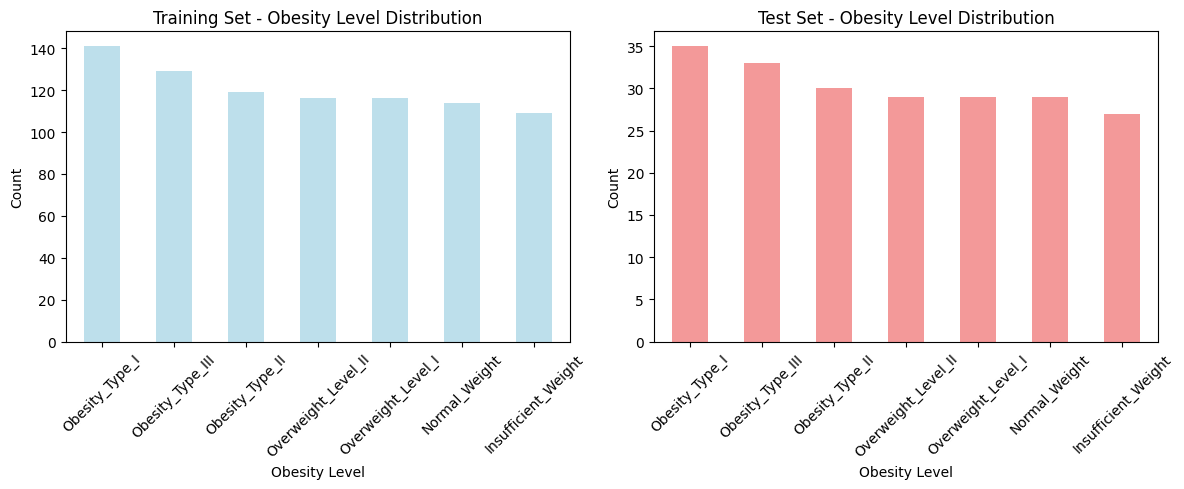

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
pd.Series(y_train).value_counts().plot(kind='bar', color='lightblue', alpha=0.8)
plt.title('Training Set - Obesity Level Distribution')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
pd.Series(y_test).value_counts().plot(kind='bar', color='lightcoral', alpha=0.8)
plt.title('Test Set - Obesity Level Distribution')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Missing Values Analysis

In [ ]:
# Cek missing values di training data
print(" Checking missing values in Training data:")
missing_train = x_train.isnull().sum()
missing_train_pct = (missing_train / len(x_train)) * 100

missing_train_df = pd.DataFrame({
    'Column': missing_train.index,
    'Missing Count': missing_train.values,
    'Missing Percentage': missing_train_pct.values
})

print("Missing Values in Training Data:")
print(missing_train_df[missing_train_df['Missing Count'] > 0])

 Checking missing values in Training data:
Missing Values in Training Data:
    Column  Missing Count  Missing Percentage
6     FCVC             31            3.672986
15  MTRANS             20            2.369668


In [ ]:
# Cek missing values di test data
print("\n Checking missing values in Test data:")
missing_test = x_test.isnull().sum()
missing_test_pct = (missing_test / len(x_test)) * 100

missing_test_df = pd.DataFrame({
    'Column': missing_test.index,
    'Missing Count': missing_test.values,
    'Missing Percentage': missing_test_pct.values
})

print("Missing Values in Test Data:")
print(missing_test_df[missing_test_df['Missing Count'] > 0])


 Checking missing values in Test data:
Missing Values in Test Data:
    Column  Missing Count  Missing Percentage
6     FCVC              6            2.830189
15  MTRANS              6            2.830189


## Handle missing values berdasarkan training data

In [ ]:
print("\n Handling Missing Values (berdasarkan training data)")
if missing_train.sum() > 0:
    for column in x_train.columns:
        if x_train[column].isnull().sum() > 0:
            if x_train[column].dtype == 'object':
                # Mode dari training data
                mode_value = x_train[column].mode()[0]
                x_train[column].fillna(mode_value, inplace=True)
                x_test[column].fillna(mode_value, inplace=True)  # Gunakan mode dari training
                print(f"Filled {column} missing values with mode: {mode_value}")
            else:
                # Median dari training data
                median_value = x_train[column].median()
                x_train[column].fillna(median_value, inplace=True)
                x_test[column].fillna(median_value, inplace=True)  # Gunakan median dari training
                print(f"Filled {column} missing values with median: {median_value}")
else:
    print("No missing values found in training data!")

print(f"\nMissing values after handling:")
print(f" Training: {x_train.isnull().sum().sum()}")
print(f" Test: {x_test.isnull().sum().sum()}")


 Handling Missing Values (berdasarkan training data)
Filled FCVC missing values with median: 2.4
Filled MTRANS missing values with mode: Public_Transportation

Missing values after handling:
 Training: 0
 Test: 0


## Data Type Conversion

In [ ]:
print("Original data types in training data:")
print(x_train.dtypes)

Original data types in training data:
Gender                             object
Age                                object
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
BMI                               float64
dtype: object


Kolom Age memiliki tipe data object, yang harus dibenarkan untuk kolom Age karena seharusnya bertipe numerik.

In [ ]:
print(f"\nDEBUGGING AGE COLUMN (Training Data):")
print(f"Sample Age values: {x_train['Age'].head(10).tolist()}")
print(f"Unique Age values (first 20): {x_train['Age'].unique()[:20]}")
print(f"Age data type: {x_train['Age'].dtype}")


DEBUGGING AGE COLUMN (Training Data):
Sample Age values: ['26', '16', '25', '23', '21', '30', '21', '25', '17', '31']
Unique Age values (first 20): ['26' '16' '25' '23' '21' '30' '17' '31' '32' '19' '33' '46' '42' '22'
 '18' '20' '51' '37' '38' '25 years']
Age data type: object


Debug Age column di training data

In [ ]:
non_numeric_age_train = x_train[pd.to_numeric(x_train['Age'], errors='coerce').isna()]
if len(non_numeric_age_train) > 0:
    print(f"Found {len(non_numeric_age_train)} non-numeric Age values in training:")
    print(non_numeric_age_train['Age'].unique())
else:
    print("All Age values in training data can be converted to numeric")

Found 13 non-numeric Age values in training:
['25 years' '21 years' '33 years' '22 years' '23 years' '26 years'
 '19 years' '36 years' '17 years' '20 years']


Cek nilai non-numerik di Age (training data)

## Konversi tipe data berdasarkan training data

In [ ]:
print("\nConverting data types berdasarkan training data")

numerical_conversions = {
    'Age': 'int',
    'Height': 'float',
    'Weight': 'float',
    'FCVC': 'float',
    'NCP': 'float',
    'CH2O': 'float',
    'FAF': 'float',
    'TUE': 'float'
}


Converting data types berdasarkan training data


In [ ]:
for col, dtype in numerical_conversions.items():
    if col in x_train.columns:
        print(f"\n Processing column {col}...")

        try:
            # Konversi training data
            x_train[col] = pd.to_numeric(x_train[col], errors='coerce')

            # Cek NaN setelah konversi di training
            nan_count_train = x_train[col].isna().sum()
            if nan_count_train > 0:
                print(f"   {nan_count_train} values became NaN in training after conversion")
                # Isi NaN dengan median dari training data yang valid
                median_val = x_train[col].median()
                x_train[col].fillna(median_val, inplace=True)
                print(f"   Filled NaN in training with median: {median_val}")

            # Konversi test data dengan parameter yang sama
            x_test[col] = pd.to_numeric(x_test[col], errors='coerce')

            # Isi NaN di test data dengan median dari training
            nan_count_test = x_test[col].isna().sum()
            if nan_count_test > 0:
                median_val = x_train[col].median()  # Median dari training!
                x_test[col].fillna(median_val, inplace=True)
                print(f"   Filled {nan_count_test} NaN in test with training median: {median_val}")

            # Konversi ke tipe yang diinginkan
            if dtype == 'int':
                x_train[col] = x_train[col].astype('int')
                x_test[col] = x_test[col].astype('int')

            print(f"   {col} successfully converted to {dtype}")
            print(f"   Training: {x_train[col].dtype}")
            print(f"   Test: {x_test[col].dtype}")

        except Exception as e:
            print(f"   Error converting {col}: {e}")



 Processing column Age...
   13 values became NaN in training after conversion
   Filled NaN in training with median: 23.0
   Filled 3 NaN in test with training median: 23.0
   Age successfully converted to int
   Training: int64
   Test: int64

 Processing column Height...
   Height successfully converted to float
   Training: float64
   Test: float64

 Processing column Weight...
   Weight successfully converted to float
   Training: float64
   Test: float64

 Processing column FCVC...
   FCVC successfully converted to float
   Training: float64
   Test: float64

 Processing column NCP...
   NCP successfully converted to float
   Training: float64
   Test: float64

 Processing column CH2O...
   CH2O successfully converted to float
   Training: float64
   Test: float64

 Processing column FAF...
   FAF successfully converted to float
   Training: float64
   Test: float64

 Processing column TUE...
   TUE successfully converted to float
   Training: float64
   Test: float64


In [ ]:
print("HASIL KONVERSI:")
print("Training data types:")
print(x_train.dtypes)

print("\nTest data types:")
print(x_test.dtypes)

HASIL KONVERSI:
Training data types:
Gender                             object
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
BMI                               float64
dtype: object

Test data types:
Gender                             object
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC   

In [ ]:
print(f"\nVERIFIKASI AGE COLUMN:")
print(f"   Training - Type: {x_train['Age'].dtype}, Min: {x_train['Age'].min()}, Max: {x_train['Age'].max()}")
print(f"   Test - Type: {x_test['Age'].dtype}, Min: {x_test['Age'].min()}, Max: {x_test['Age'].max()}")
print(f"   Training sample: {x_train['Age'].head(5).tolist()}")
print(f"   Test sample: {x_test['Age'].head(5).tolist()}")

if x_train['Age'].dtype == 'object':
    print("Age masih bertipe object di training data!")
    print("Top Age values in training:")
    print(x_train['Age'].value_counts().head(10))
else:
    print("Age berhasil dikonversi ke numerik")


VERIFIKASI AGE COLUMN:
   Training - Type: int64, Min: 14, Max: 55
   Test - Type: int64, Min: 16, Max: 45
   Training sample: [26, 16, 25, 23, 21]
   Test sample: [21, 18, 23, 38, 24]
Age berhasil dikonversi ke numerik


##  Check Distribution in Every Column

In [ ]:
print(" CHECK DISTRIBUTION IN EVERY COLUMN")
print("-" * 50)

categorical_cols = x_train.select_dtypes(include=['object']).columns
numerical_cols = x_train.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical columns ({len(categorical_cols)}): {list(categorical_cols)}")
print(f"Numerical columns ({len(numerical_cols)}): {list(numerical_cols)}")

 CHECK DISTRIBUTION IN EVERY COLUMN
--------------------------------------------------
Categorical columns (8): ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Numerical columns (9): ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']


In [ ]:
print("CATEGORICAL COLUMNS DISTRIBUTION:")

for col in categorical_cols:
    print(f"\n🔹 {col}:")
    print("Training set distribution:")
    train_dist = x_train[col].value_counts()
    print(train_dist)
    print("Percentage:")
    print((train_dist / len(x_train) * 100).round(2))

    print("Test set distribution:")
    test_dist = x_test[col].value_counts()
    print(test_dist)
    print("Percentage:")
    print((test_dist / len(x_test) * 100).round(2))

CATEGORICAL COLUMNS DISTRIBUTION:

🔹 Gender:
Training set distribution:
Gender
Male      427
Female    417
Name: count, dtype: int64
Percentage:
Gender
Male      50.59
Female    49.41
Name: count, dtype: float64
Test set distribution:
Gender
Female    107
Male      105
Name: count, dtype: int64
Percentage:
Gender
Female    50.47
Male      49.53
Name: count, dtype: float64

🔹 family_history_with_overweight:
Training set distribution:
family_history_with_overweight
yes    696
no     148
Name: count, dtype: int64
Percentage:
family_history_with_overweight
yes    82.46
no     17.54
Name: count, dtype: float64
Test set distribution:
family_history_with_overweight
yes    166
no      46
Name: count, dtype: int64
Percentage:
family_history_with_overweight
yes    78.3
no     21.7
Name: count, dtype: float64

🔹 FAVC:
Training set distribution:
FAVC
yes    747
no      97
Name: count, dtype: int64
Percentage:
FAVC
yes    88.51
no     11.49
Name: count, dtype: float64
Test set distribution:
FAVC
ye

In [ ]:
print("NUMERICAL COLUMNS DISTRIBUTION:")

for col in numerical_cols:
    print(f"\n🔹 {col}:")
    print("Training set statistics:")
    print(x_train[col].describe())
    print("Test set statistics:")
    print(x_test[col].describe())


NUMERICAL COLUMNS DISTRIBUTION:

🔹 Age:
Training set statistics:
count    844.000000
mean      24.299763
std        6.351241
min       14.000000
25%       20.000000
50%       23.000000
75%       26.000000
max       55.000000
Name: Age, dtype: float64
Test set statistics:
count    212.000000
mean      23.976415
std        6.063207
min       16.000000
25%       19.750000
50%       22.500000
75%       26.000000
max       45.000000
Name: Age, dtype: float64

🔹 Height:
Training set statistics:
count    844.000000
mean       1.699905
std        0.091067
min        1.500000
25%        1.630000
50%        1.700000
75%        1.760000
max        1.950000
Name: Height, dtype: float64
Test set statistics:
count    212.000000
mean       1.700708
std        0.093712
min        1.450000
25%        1.637500
50%        1.700000
75%        1.760000
max        1.930000
Name: Height, dtype: float64

🔹 Weight:
Training set statistics:
count    844.000000
mean      86.395853
std       25.774371
min       3

## Anomaly Detection

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

print(" Detecting outliers using IQR method")

outlier_summary = {}

for col in numerical_cols:
    print(f"\n Analyzing outliers in {col}:")

    # Hitung IQR dari training data
    Q1 = x_train[col].quantile(0.25)
    Q3 = x_train[col].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outlier di training data
    outliers_train = x_train[(x_train[col] < lower_bound) | (x_train[col] > upper_bound)]
    outlier_count_train = len(outliers_train)
    outlier_percentage_train = (outlier_count_train / len(x_train)) * 100

    print(f"   Training - Outliers: {outlier_count_train} ({outlier_percentage_train:.2f}%)")
    print(f"   Range: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"   Min: {x_train[col].min():.2f}, Max: {x_train[col].max():.2f}")

    outlier_summary[col] = {
        'count': outlier_count_train,
        'percentage': outlier_percentage_train,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

 Detecting outliers using IQR method

 Analyzing outliers in Age:
   Training - Outliers: 64 (7.58%)
   Range: [11.00, 35.00]
   Min: 14.00, Max: 55.00

 Analyzing outliers in Height:
   Training - Outliers: 0 (0.00%)
   Range: [1.43, 1.96]
   Min: 1.50, Max: 1.95

 Analyzing outliers in Weight:
   Training - Outliers: 0 (0.00%)
   Range: [9.59, 165.34]
   Min: 39.00, Max: 165.06

 Analyzing outliers in FCVC:
   Training - Outliers: 0 (0.00%)
   Range: [0.50, 4.50]
   Min: 1.00, Max: 3.00

 Analyzing outliers in NCP:
   Training - Outliers: 222 (26.30%)
   Range: [1.99, 3.60]
   Min: 1.00, Max: 4.00

 Analyzing outliers in CH2O:
   Training - Outliers: 0 (0.00%)
   Range: [0.13, 3.89]
   Min: 1.00, Max: 3.00

 Analyzing outliers in FAF:
   Training - Outliers: 0 (0.00%)
   Range: [-2.19, 3.89]
   Min: 0.00, Max: 3.00

 Analyzing outliers in TUE:
   Training - Outliers: 0 (0.00%)
   Range: [-1.50, 2.50]
   Min: 0.00, Max: 2.00

 Analyzing outliers in BMI:
   Training - Outliers: 0 (0.00

Deteksi outlier menggunakan IQR method untuk numerical columns

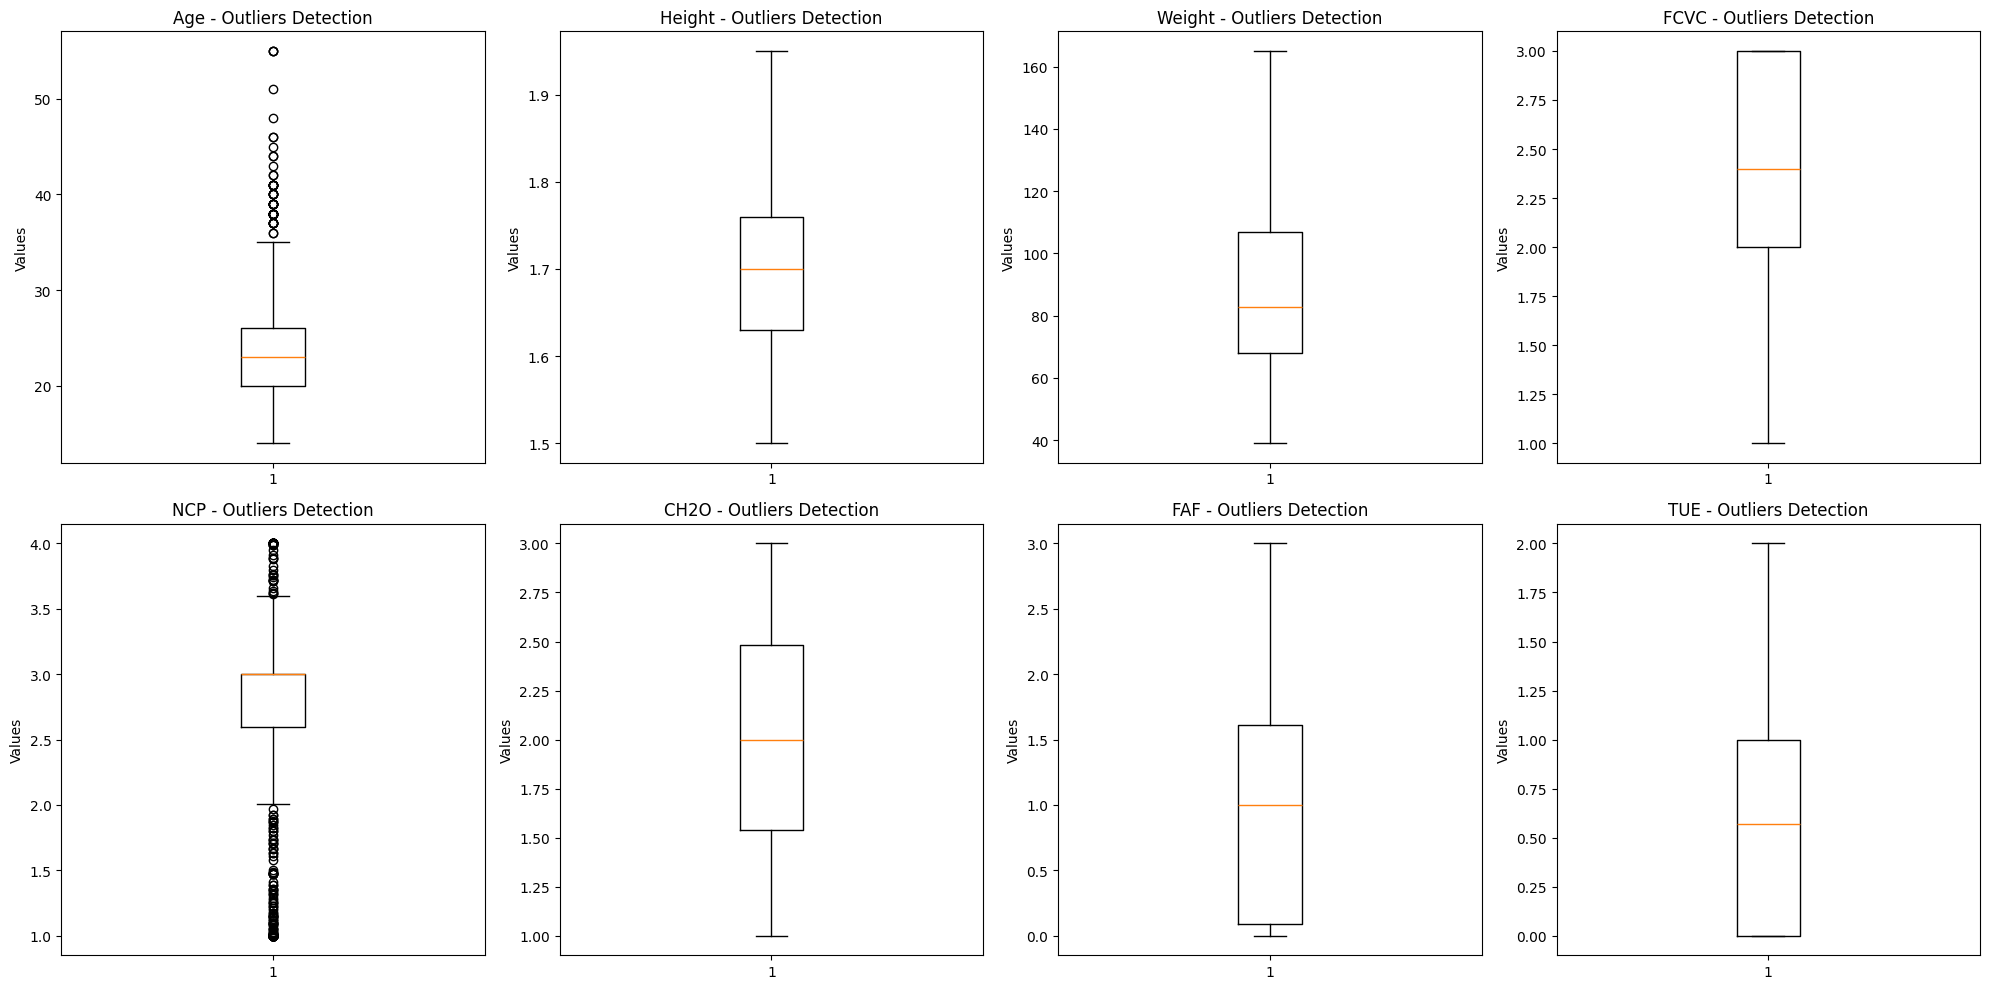

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        # Boxplot untuk melihat outliers
        axes[i].boxplot(x_train[col], vert=True)
        axes[i].set_title(f'{col} - Outliers Detection')
        axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

## EDA

In [ ]:
# Target distribution
print("Target Variable Distribution:")
target_counts = pd.Series(y_train).value_counts()
print(target_counts)

Target Variable Distribution:
NObeyesdad
Obesity_Type_I         141
Obesity_Type_III       129
Obesity_Type_II        119
Overweight_Level_II    116
Overweight_Level_I     116
Normal_Weight          114
Insufficient_Weight    109
Name: count, dtype: int64


## Visualisasi

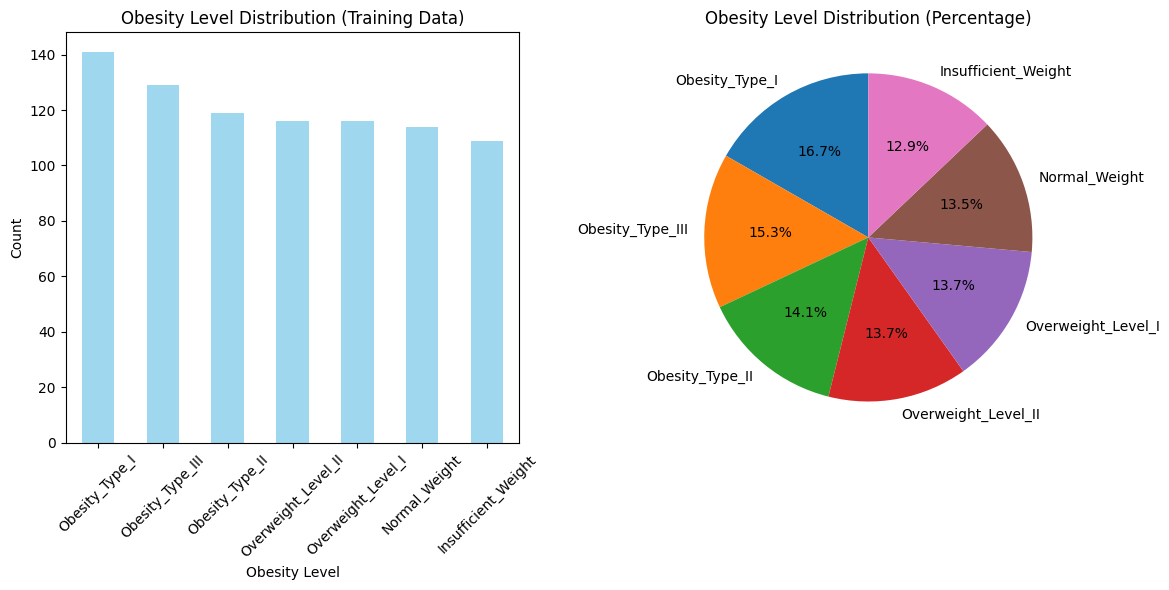

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
target_counts.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Obesity Level Distribution (Training Data)')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
target_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Obesity Level Distribution (Percentage)')
plt.ylabel('')

plt.tight_layout()
plt.show()


Correlation Analysis:


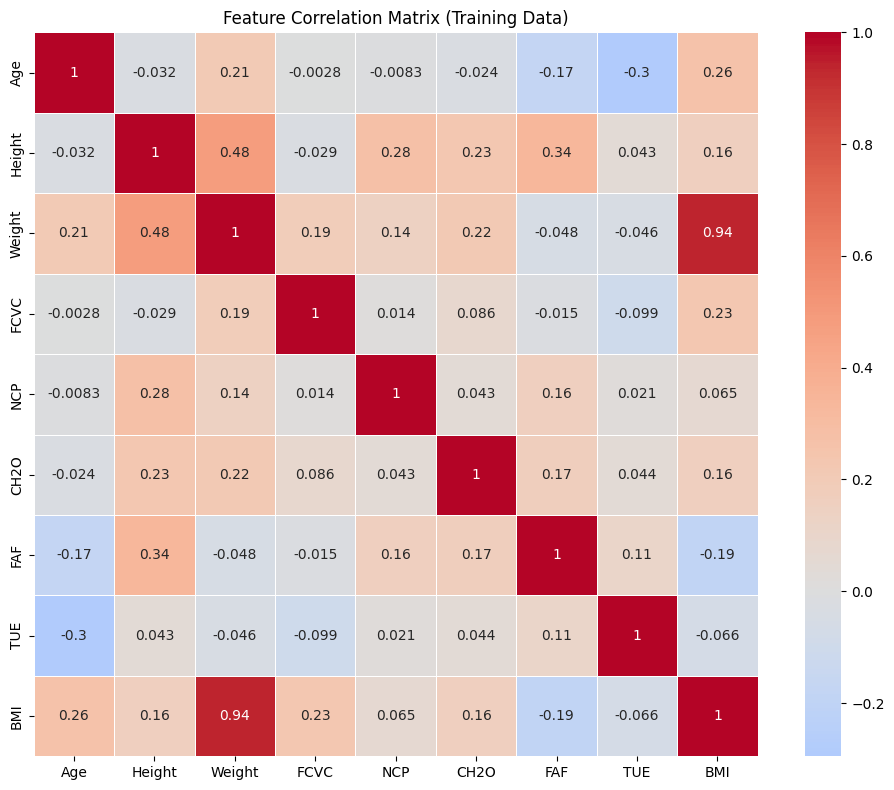

In [ ]:
print(f"\nCorrelation Analysis:")
correlation_data = x_train[numerical_cols].copy()
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix (Training Data)')
plt.tight_layout()
plt.show()


 Feature vs Target Analysis:


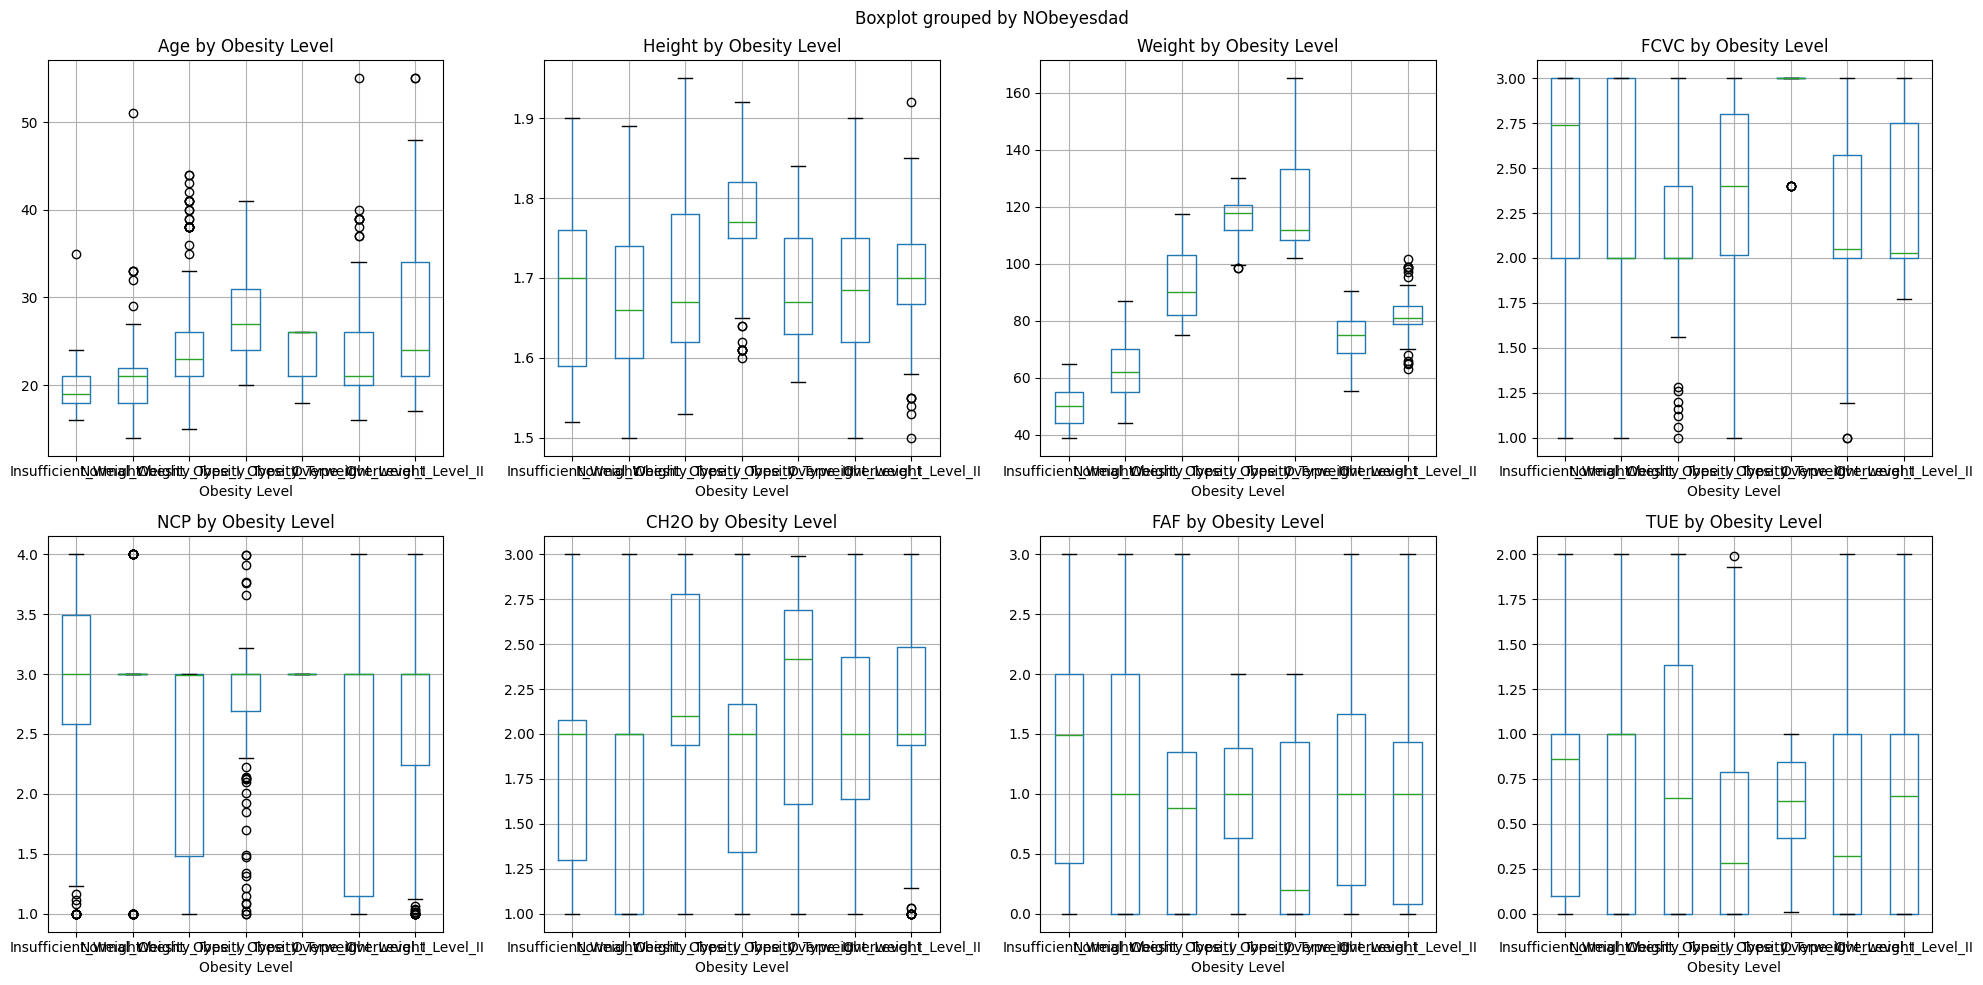

In [ ]:
# Feature vs Target analysis
print(f"\n Feature vs Target Analysis:")

# Numerical features vs target
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        # Boxplot untuk melihat distribusi per target class
        combined_data = pd.concat([x_train[col], y_train], axis=1)
        combined_data.boxplot(column=col, by='NObeyesdad', ax=axes[i])
        axes[i].set_title(f'{col} by Obesity Level')
        axes[i].set_xlabel('Obesity Level')

plt.tight_layout()
plt.show()

In [ ]:
# Categorical features vs target
print(f"\nCategorical Features Analysis:")
for col in categorical_cols:
    print(f"\n🔹 {col} vs Target:")
    crosstab = pd.crosstab(x_train[col], y_train, normalize='index') * 100
    print(crosstab.round(2))



Categorical Features Analysis:

🔹 Gender vs Target:
NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Gender                                                           
Female                    16.31          13.19           16.31   
Male                       9.60          13.82           17.10   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Gender                                                              
Female                 0.00             30.94               14.15   
Male                  27.87              0.00               13.35   

NObeyesdad  Overweight_Level_II  
Gender                           
Female                     9.11  
Male                      18.27  

🔹 family_history_with_overweight vs Target:
NObeyesdad                      Insufficient_Weight  Normal_Weight  \
family_history_with_overweight                                       
no                                            38.51          32.43   
yes           


📊 Categorical Features Analysis:

🔹 Gender vs Target:
NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Gender                                                           
Female                    16.31          13.19           16.31   
Male                       9.60          13.82           17.10   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Gender                                                              
Female                 0.00             30.94               14.15   
Male                  27.87              0.00               13.35   

NObeyesdad  Overweight_Level_II  
Gender                           
Female                     9.11  
Male                      18.27  


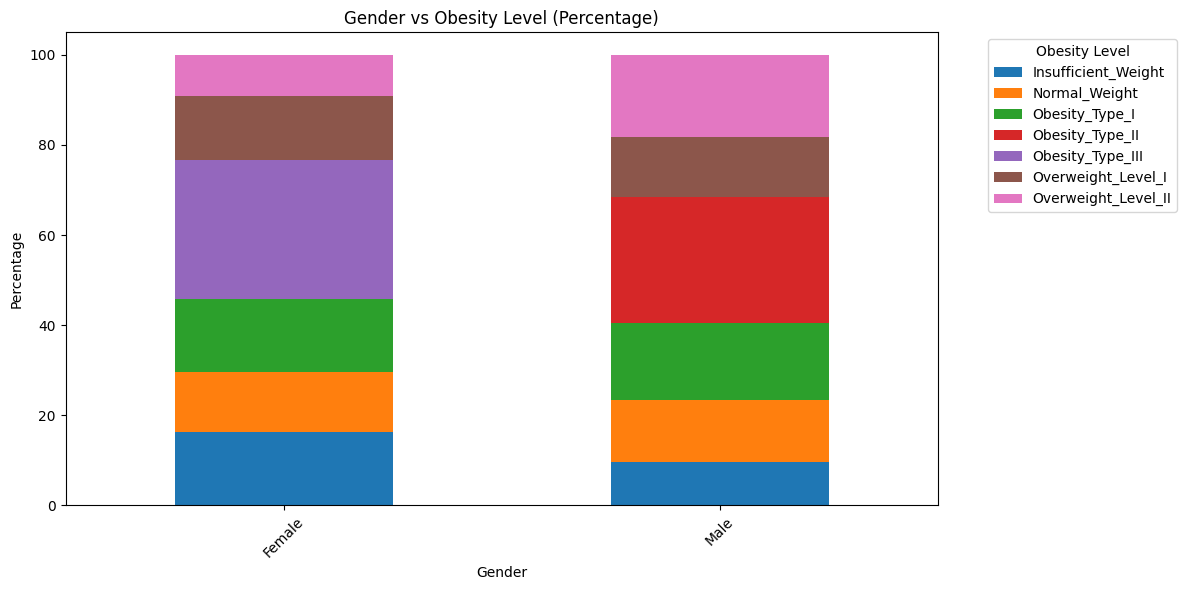


🔹 family_history_with_overweight vs Target:
NObeyesdad                      Insufficient_Weight  Normal_Weight  \
family_history_with_overweight                                       
no                                            38.51          32.43   
yes                                            7.47           9.48   

NObeyesdad                      Obesity_Type_I  Obesity_Type_II  \
family_history_with_overweight                                    
no                                        2.70              0.0   
yes                                      19.68             17.1   

NObeyesdad                      Obesity_Type_III  Overweight_Level_I  \
family_history_with_overweight                                         
no                                          0.00               18.92   
yes                                        18.53               12.64   

NObeyesdad                      Overweight_Level_II  
family_history_with_overweight                       
no      

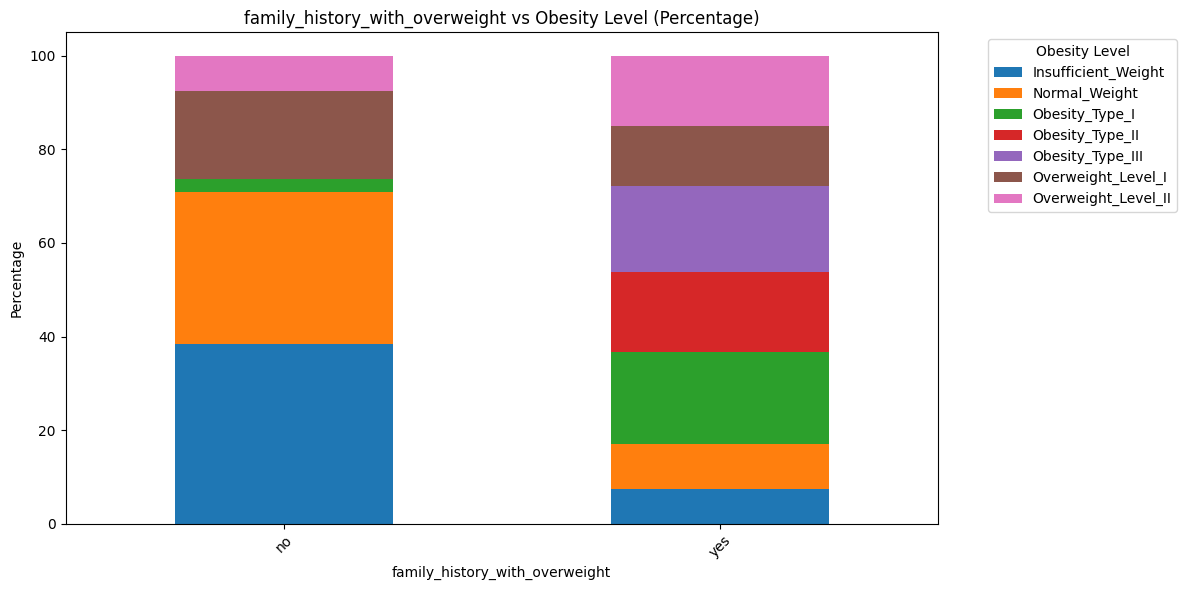


🔹 FAVC vs Target:
NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
FAVC                                                             
no                        22.68          27.84            9.28   
yes                       11.65          11.65           17.67   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
FAVC                                                                
no                     3.09              0.00               11.34   
yes                   15.53             17.27               14.06   

NObeyesdad  Overweight_Level_II  
FAVC                             
no                        25.77  
yes                       12.18  


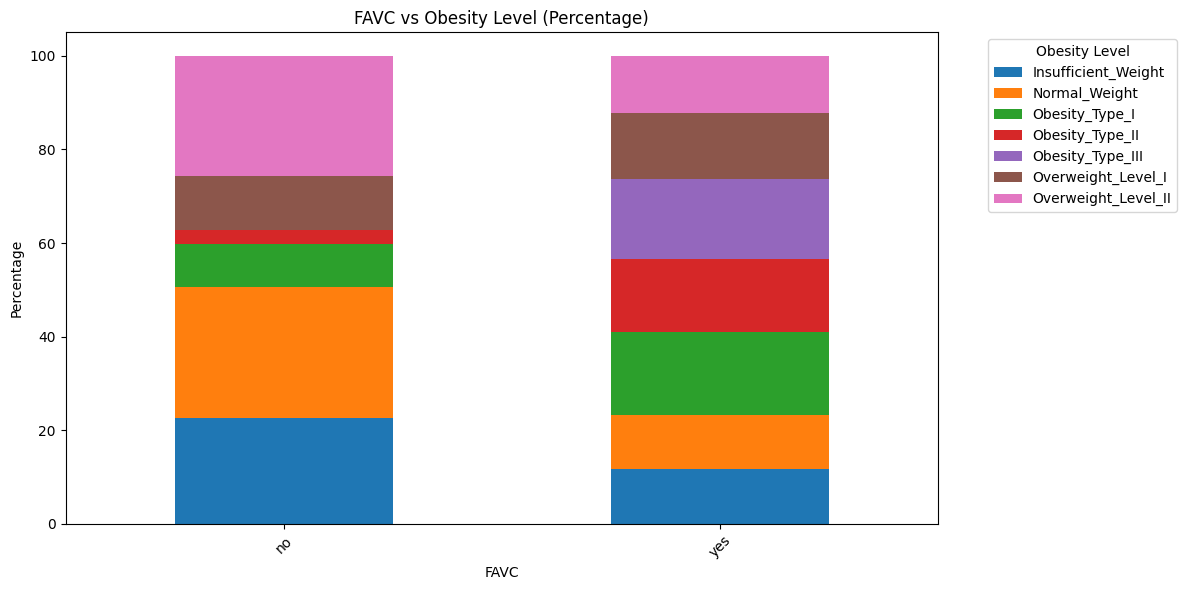


🔹 CAEC vs Target:
NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
CAEC                                                             
Always                     0.00          73.91           13.04   
Frequently                49.51          33.98            1.94   
Sometimes                  7.90           8.48           19.54   
no                        13.64          13.64            0.00   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
CAEC                                                                
Always                 4.35              0.00                8.70   
Frequently             0.97              0.00                7.77   
Sometimes             16.67             18.53               13.22   
no                     4.55              0.00               63.64   

NObeyesdad  Overweight_Level_II  
CAEC                             
Always                     0.00  
Frequently                 5.83  
Sometimes                 15.66  

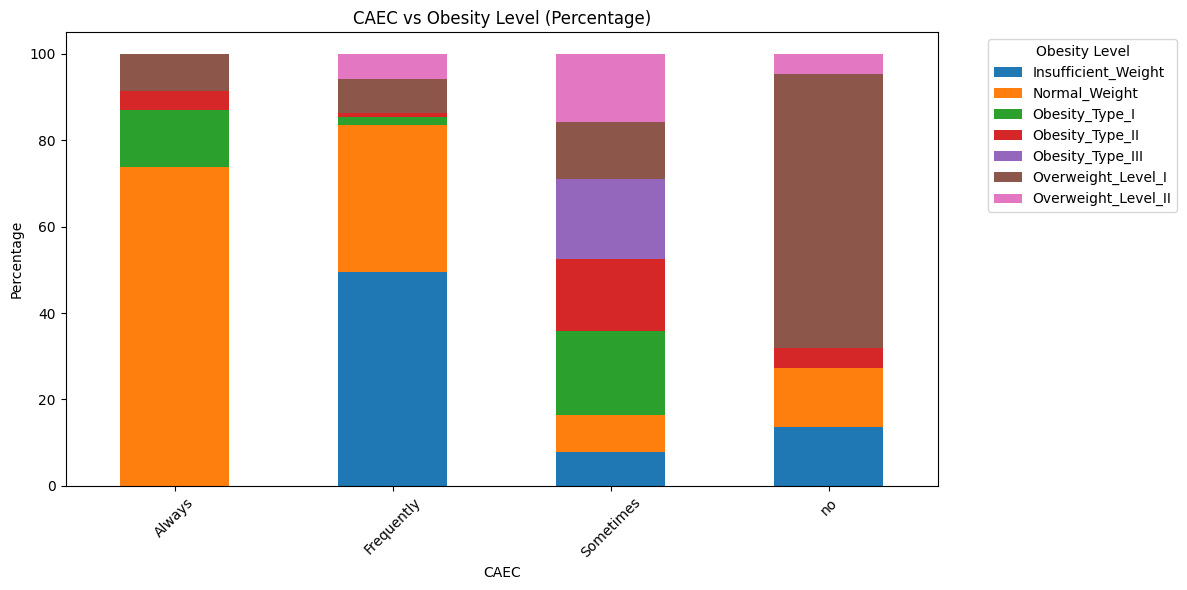


🔹 SMOKE vs Target:
NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
SMOKE                                                            
no                        13.04          13.29           16.79   
yes                        6.25          25.00           12.50   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
SMOKE                                                               
no                    13.89             15.58               13.65   
yes                   25.00              0.00               18.75   

NObeyesdad  Overweight_Level_II  
SMOKE                            
no                        13.77  
yes                       12.50  


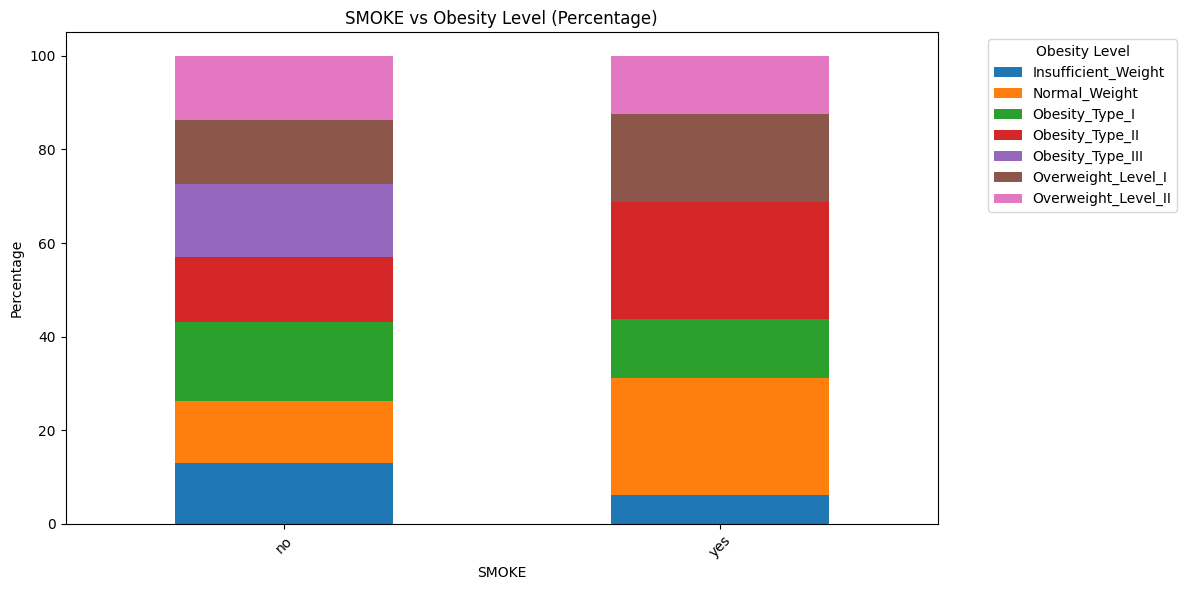


🔹 SCC vs Target:
NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
SCC                                                              
no                        12.48          12.48           17.35   
yes                       20.93          32.56            4.65   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
SCC                                                                 
no                    14.73              16.1               12.61   
yes                    2.33               0.0               34.88   

NObeyesdad  Overweight_Level_II  
SCC                              
no                        14.23  
yes                        4.65  


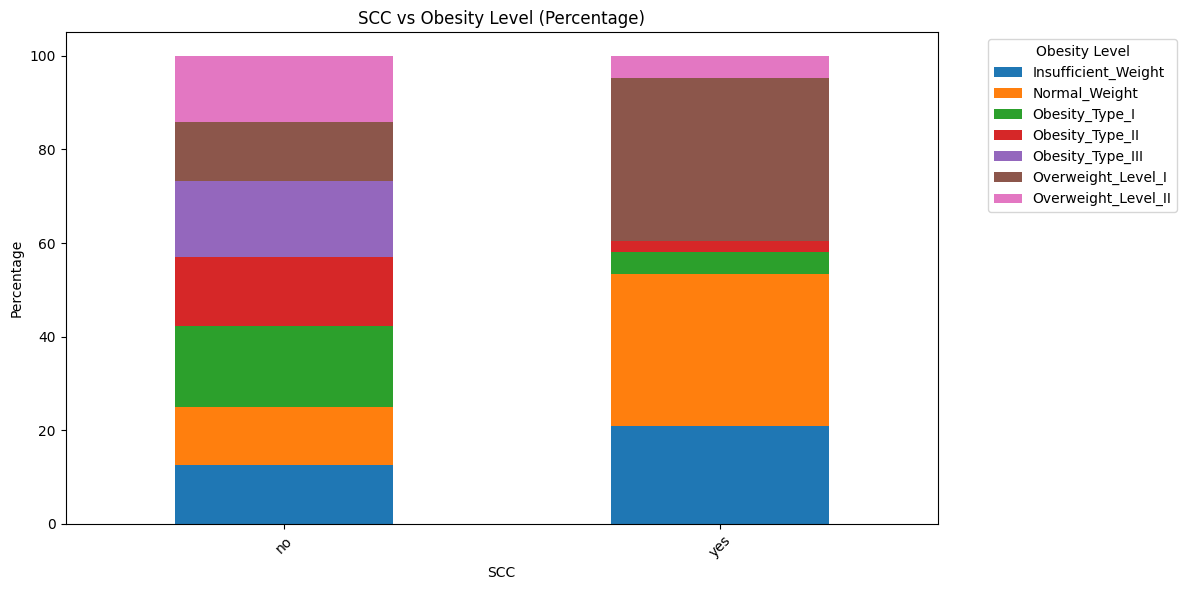


🔹 CALC vs Target:
NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
CALC                                                             
Always                     0.00         100.00            0.00   
Frequently                 3.70          22.22           14.81   
Sometimes                 10.58          11.86           12.41   
no                        18.66          15.67           25.75   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
CALC                                                                
Always                 0.00              0.00                0.00   
Frequently             7.41              0.00               29.63   
Sometimes             15.88             23.54               16.42   
no                    11.19              0.00                6.72   

NObeyesdad  Overweight_Level_II  
CALC                             
Always                     0.00  
Frequently                22.22  
Sometimes                  9.31  

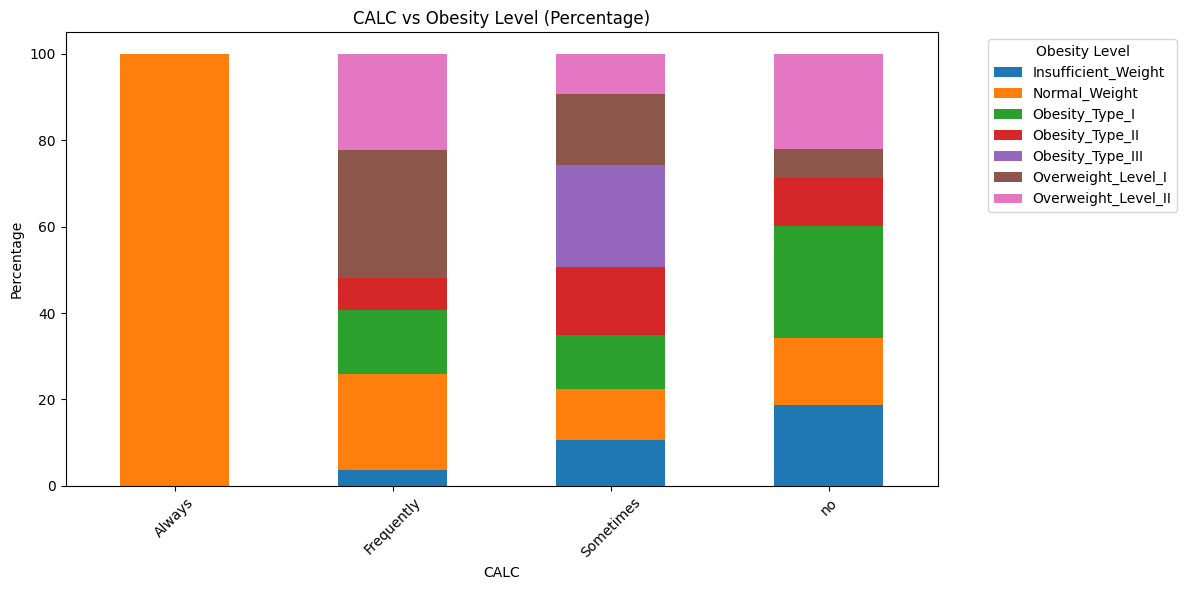


🔹 MTRANS vs Target:
NObeyesdad             Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
MTRANS                                                                      
Automobile                           10.29           8.00           19.43   
Bike                                  0.00           0.00            0.00   
Motorbike                             0.00          33.33           33.33   
Public_Transportation                13.72          13.25           16.25   
Walking                              15.38          53.85            7.69   

NObeyesdad             Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
MTRANS                                                                         
Automobile                       20.00              0.00               16.00   
Bike                             33.33              0.00               66.67   
Motorbike                         0.00              0.00               16.67   
Public_Transportation            12.93 

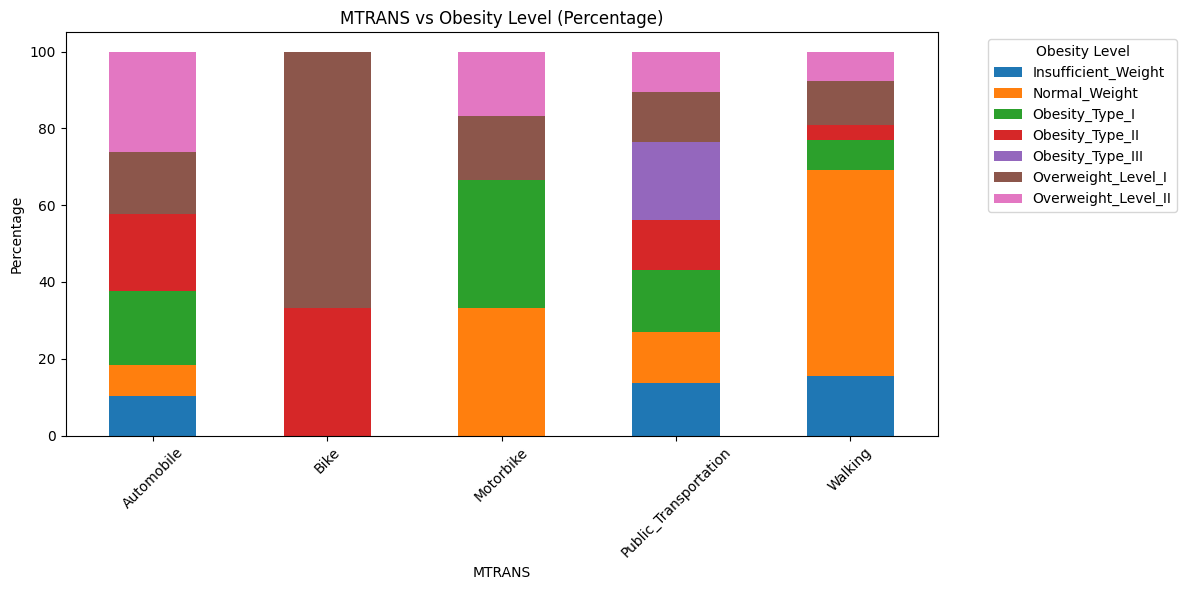

In [ ]:
# Categorical features vs target
print(f"\n📊 Categorical Features Analysis:")
for col in categorical_cols:
    print(f"\n🔹 {col} vs Target:")
    crosstab = pd.crosstab(x_train[col], y_train, normalize='index') * 100
    print(crosstab.round(2))

    # Visualisasi
    plt.figure(figsize=(12, 6))
    crosstab.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'{col} vs Obesity Level (Percentage)')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Encoding

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

labels = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
          'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
          'Overweight_Level_II']

print(f"\nTarget classes: {label_encoder.classes_}")
print(f"Explicit labels: {labels}")



Target classes: ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']
Explicit labels: ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']


## Preprocessing Pipeline

In [ ]:
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                    'SMOKE', 'SCC', 'CALC', 'MTRANS']

In [ ]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

feature_preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

## Pipeline

In [ ]:
rf_pipeline = Pipeline([
    ('preprocessing', feature_preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced',
        random_state=42
    ))
])


In [ ]:
gb_pipeline = Pipeline([
    ('preprocessing', feature_preprocessor),
    ('classifier', GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    ))
])


## Modeling

In [ ]:
rf_pipeline.fit(x_train, y_train_encoded)
gb_pipeline.fit(x_train, y_train_encoded)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE', 'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('classifier',
                 GradientBoostingClassifier(max_depth=6, min_samples_leaf=2,
                                            min_samples_split=5,
                                            random_state=42))])

## Evaluation

In [ ]:
rf_pipeline.fit(x_train, y_train_encoded)

# Evaluasi
rf_preds = rf_pipeline.predict(x_test)
rf_labels = label_encoder.inverse_transform(rf_preds)
y_test_labels = label_encoder.inverse_transform(y_test_encoded)

print("=== Random Forest Classification Report ===")
print(classification_report(y_test_labels, rf_labels, target_names=labels))

=== Random Forest Classification Report ===
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        27
      Normal_Weight       0.93      0.97      0.95        29
     Obesity_Type_I       1.00      0.97      0.99        35
    Obesity_Type_II       0.94      0.97      0.95        30
   Obesity_Type_III       0.97      0.97      0.97        33
 Overweight_Level_I       0.96      0.93      0.95        29
Overweight_Level_II       0.96      0.93      0.95        29

           accuracy                           0.96       212
          macro avg       0.96      0.96      0.96       212
       weighted avg       0.96      0.96      0.96       212



In [ ]:
gb_pipeline.fit(x_train, y_train_encoded)

# Evaluasi
gb_preds = gb_pipeline.predict(x_test)
gb_labels = label_encoder.inverse_transform(gb_preds)

print("=== Gradient Boosting Classification Report ===")
print(classification_report(y_test_labels, gb_labels, target_names=labels))

=== Gradient Boosting Classification Report ===
                     precision    recall  f1-score   support

Insufficient_Weight       0.90      1.00      0.95        27
      Normal_Weight       0.96      0.90      0.93        29
     Obesity_Type_I       0.97      0.97      0.97        35
    Obesity_Type_II       0.93      0.93      0.93        30
   Obesity_Type_III       0.97      0.97      0.97        33
 Overweight_Level_I       1.00      0.97      0.98        29
Overweight_Level_II       1.00      1.00      1.00        29

           accuracy                           0.96       212
          macro avg       0.96      0.96      0.96       212
       weighted avg       0.96      0.96      0.96       212



## Pickle

In [ ]:
import pickle
import os

# Global variables
model = None
label_encoder = None
MODEL_LOADED = False

def load_models():
    global model, label_encoder, MODEL_LOADED
    try:
        if not os.path.exists("best_model.pkl"):
            print("❌ Model file not found")
            return False
        if not os.path.exists("label_encoder.pkl"):
            print("❌ Label encoder file not found")
            return False

        with open("best_model.pkl", "rb") as f:
            model = pickle.load(f)
        print("✅ Model loaded successfully")

        with open("label_encoder.pkl", "rb") as f:
            label_encoder = pickle.load(f)
        print("✅ Label encoder loaded successfully")

        MODEL_LOADED = True
        return True

    except Exception as e:
        print(f"❌ Error loading model: {e}")
        MODEL_LOADED = False
        return False


In [ ]:
# Download otomatis
files.download("best_model.pkl")
files.download("label_encoder.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>